In [1]:
pip install -U fortran-magic

Requirement already up-to-date: fortran-magic in /usr/local/lib/python3.6/dist-packages (0.7)


In [2]:
%reload_ext fortranmagic

/usr/local/lib/python3.6/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [3]:
%matplotlib inline
# %load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
y2019 = pd.date_range(start='2019-01-01', end='2020-01-01', freq='M')
calendar1 = y2019.values.astype('datetime64[D]')
events = pd.to_datetime(['2019-01-31', '2019-02-28', '2019-03-31']).values.astype('datetime64[D]')
values = np.array([156.69, 258.3, 458.36])

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [5]:
assert ran_the_first_cell, "Oh noes!"

In [6]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [7]:
my_list = [5, '8', {}, 98, 'six', 3.6]
my_list

[5, '8', {}, 98, 'six', 3.6]

In [8]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [9]:
third = my_list[2]
sixth = my_list[5]
print('Third: %s \n6th: %s ' % (third, sixth))

Third: {} 
6th: 3.6 


In [10]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [11]:
my_last = my_list[-1]
ap = my_list[-3]
print('Last: %s \nThird to last: %s' % (my_last, ap))

Last: 3.6 
Third to last: 98


In [12]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [13]:
my_slice = my_list[2:4]
my_slice

[{}, 98]

In [14]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [15]:
first_five = my_list[0:5]
first_five

[5, '8', {}, 98, 'six']

In [16]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [17]:
after_fifth = my_list[5:]
after_fifth

[3.6]

In [18]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [19]:
nums = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
nums[1::2] # Odd integers

[1, 3, 5, 7, 9]

In [20]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [21]:
nums[::-1] # Countdown

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [22]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [23]:
x = nums.copy()
x.append(10)
print('Digits: %s\n0 to 10: ' % (nums), x)

Digits: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0 to 10:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [24]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [25]:
[num + 1 for num in nums]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [26]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [27]:
leagues = {'Spain': ['Barcelona', 'Real Madrid'], 'England': ['Man Utd', 'Liverpool', 'Chelsea']}
leagues

{'England': ['Man Utd', 'Liverpool', 'Chelsea'],
 'Spain': ['Barcelona', 'Real Madrid']}

In [28]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [29]:
leagues['Italy'] = ['Juventus', 'Inter', 'Milan']
leagues

{'England': ['Man Utd', 'Liverpool', 'Chelsea'],
 'Italy': ['Juventus', 'Inter', 'Milan'],
 'Spain': ['Barcelona', 'Real Madrid']}

In [30]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [31]:
del leagues['Italy']
leagues

{'England': ['Man Utd', 'Liverpool', 'Chelsea'],
 'Spain': ['Barcelona', 'Real Madrid']}

In [32]:
# No slicing.
# philosophers['Bertrand':'Immanuel']

In [33]:
#leagues['Spain':]

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/pacino.gif?raw=1" alt="Drawing" style="width: 100%;"/></center>


In [34]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [35]:
c = [[3, 5,-9],
     [6, 3, 5],
     [8,-8, 6]]
d = [[3, 2, 5],
     [-5,5, 9]]  

In [36]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [37]:
def matmul2(A, B):
  rows_out = len(A)
  cols_out = len(B[0])
  out = [[0 for col in range(cols_out)] for row in range(rows_out)]
  for i in range(len(A)):  
    for j in range(len(B[0])):  
      for k in range(len(B)):  
        out[i][j] += A[i][k] * B[k][j]  
  for r in out:  
    print(r)  

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/gross.gif?raw=1" alt="Drawing" style="width: 50%;"/></center>


In [38]:
%%time

matmul(a, b)

CPU times: user 32 µs, sys: 0 ns, total: 32 µs
Wall time: 36.5 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [39]:
%%time

matmul(c, d)

CPU times: user 25 µs, sys: 0 ns, total: 25 µs
Wall time: 28.6 µs


[[-16, 31, 60], [3, 27, 57], [64, -24, -32]]

In [40]:
%%time

matmul2(c, d)

[-16, 31, 60]
[3, 27, 57]
[64, -24, -32]
CPU times: user 568 µs, sys: 0 ns, total: 568 µs
Wall time: 574 µs


In [41]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.5387506097972268, 0.7998580220411602, 0.23795270878631625],
 [0.6816390904235177, 0.26071654712186176, 0.13660467791715958]]

In [42]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 7.15 s, sys: 17.1 ms, total: 7.16 s
Wall time: 7.21 s


In [43]:
%%time 

randc = random_matrix(800, 300)
randd = random_matrix(300, 800)
y = matmul(randc, randd)

CPU times: user 39 s, sys: 54.3 ms, total: 39 s
Wall time: 39.1 s


In [44]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [45]:
def dot(x, y):
    res = 0
    for i in range(len(x)):
        res += x[i] * y[i]
    return res

In [46]:
%%fortran

subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [47]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)
array_data

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 9.9997e+04, 9.9998e+04,
       9.9999e+04])

In [48]:
list1 = [float(j) for j in range(845151)]
array1 = np.array(list1)
array1

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 8.45148e+05,
       8.45149e+05, 8.45150e+05])

In [49]:
list_2 = [float(j) for j in range(5623)]
array = np.array(list_2)

In [50]:
list2 = [float(k) for k in range(4956)]
array2 = np.array(list2)
array2

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.953e+03, 4.954e+03,
       4.955e+03])

In [51]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11.5 ms, sys: 0 ns, total: 11.5 ms
Wall time: 13.2 ms


333328333350000.0

In [52]:
%%time 
python_dot_product(array, array)

CPU times: user 4.69 ms, sys: 0 ns, total: 4.69 ms
Wall time: 5.48 ms


59247104995.0

In [53]:
%%time
dot(list1, list1)

CPU times: user 83.4 ms, sys: 994 µs, total: 84.4 ms
Wall time: 87.1 ms


2.012245215693644e+17

In [54]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 235 µs, sys: 2 µs, total: 237 µs
Wall time: 248 µs


333328333350000.0

In [55]:
%%time
fortran_dot_product(array, array)

CPU times: user 24 µs, sys: 0 ns, total: 24 µs
Wall time: 27.7 µs


59247104995.0

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/sloth.gif?raw=1" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [56]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [57]:
def ex(*args):
    arr = []
    for a in args:
        arr.append(a)
    return [x * 4 for x in arr]

ex(5, 9.29549, 2 + 9j, 'xdxd')

[20, 37.18196, (8+36j), 'xdxdxdxdxdxdxdxd']

In [58]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [59]:
alg = 'x**y + z *w'
b_code = compile(alg, '', 'eval')
dis.dis(b_code)

  1           0 LOAD_NAME                0 (x)
              2 LOAD_NAME                1 (y)
              4 BINARY_POWER
              6 LOAD_NAME                2 (z)
              8 LOAD_NAME                3 (w)
             10 BINARY_MULTIPLY
             12 BINARY_ADD
             14 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/runaway.gif?raw=1" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/thisisfine.gif?raw=1" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [60]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [61]:
data1 = np.array([98.3, 6.0, 635.36265, 33.6656956])
data1

array([ 98.3      ,   6.       , 635.36265  ,  33.6656956])

In [62]:
data + data

array([2, 4, 6, 8])

In [63]:
data1 * data1 + data1

array([9.76119000e+03, 4.20000000e+01, 4.04321060e+05, 1.16704476e+03])

In [64]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1 ms, sys: 0 ns, total: 1 ms
Wall time: 1.23 ms


333328333350000.0

In [65]:
%%time 
import functools
m = [x * x for x in data1]
print(functools.reduce(lambda a, b : a + b, m))

414517.9660752544
CPU times: user 571 µs, sys: 0 ns, total: 571 µs
Wall time: 779 µs


In [66]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 308 µs, sys: 3.99 ms, total: 4.3 ms
Wall time: 4.93 ms


333328333350000.0

In [67]:
%%time
data1.dot(data1)

CPU times: user 26 µs, sys: 0 ns, total: 26 µs
Wall time: 30.3 µs


414517.9660752544

In [68]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 220 µs, sys: 0 ns, total: 220 µs
Wall time: 229 µs


333328333350000.0

In [69]:
# Numpy won't allow us to write a string into an int array.
# data[0] = "foo"

In [70]:
data1[0] = '4.0' #It casts strings into floats/integers
data1

array([  4.       ,   6.       , 635.36265  ,  33.6656956])

In [72]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [73]:
data1.append(1651465)

AttributeError: ignored

In [74]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [75]:
expand = data1.reshape(4, 1)
expand

array([[  4.       ],
       [  6.       ],
       [635.36265  ],
       [ 33.6656956]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [76]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [77]:
data1 = np.array(data1, dtype='cfloat').reshape(2, 2)
print("Array:\n", data1, sep='')
print("\n")
print("DType:", data1.dtype)
print("Shape:", data1.shape)
print("Strides:", data1.strides)
print("Data:", data1.data.tobytes())

Array:
[[  4.       +0.j   6.       +0.j]
 [635.36265  +0.j  33.6656956+0.j]]


DType: complex128
Shape: (2, 2)
Strides: (32, 16)
Data: b'\x00\x00\x00\x00\x00\x00\x10@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18@\x00\x00\x00\x00\x00\x00\x00\x00(\x0f\x0b\xb5\xe6\xda\x83@\x00\x00\x00\x00\x00\x00\x00\x00\xa9\x8bo\x835\xd5@@\x00\x00\x00\x00\x00\x00\x00\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [78]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [79]:
data1 = np.arange(20).reshape(4,5)
data1

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [80]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [81]:
data1 + data1

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18],
       [20, 22, 24, 26, 28],
       [30, 32, 34, 36, 38]])

In [82]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [83]:
np.average(data1)

9.5

In [84]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [85]:
data1 >= 10

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [86]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [87]:
((data1 % 2) == 0) | (data1 > 11)

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [88]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [89]:
data1 @ data.T

array([[  30,   80,  130],
       [  80,  255,  430],
       [ 130,  430,  730],
       [ 180,  605, 1030]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [90]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [91]:
tan = np.tan(np.logspace(-10, 10, 50))
arctan = np.arctan(np.logspace(-10, 10, 50))
tan

array([ 1.00000000e-10,  2.55954792e-10,  6.55128557e-10,  1.67683294e-09,
        4.29193426e-09,  1.09854114e-08,  2.81176870e-08,  7.19685673e-08,
        1.84206997e-07,  4.71486636e-07,  1.20679264e-06,  3.08884360e-06,
        7.90604321e-06,  2.02358965e-05,  5.17947468e-05,  1.32571137e-04,
        3.39322190e-04,  8.68511592e-04,  2.22300014e-03,  5.68992743e-03,
        1.45645145e-02,  3.72932117e-02,  9.57001095e-02,  2.49178470e-01,
        7.21568367e-01, -3.43990410e+01,  1.40824775e+00,  1.76926533e+00,
       -8.06120647e+00, -4.83244865e-01, -1.80034252e-01,  6.77576282e-01,
       -5.91090818e+02,  2.42379306e-01,  1.57382526e-01, -3.02127858e+00,
       -1.19390190e-01, -3.36255780e+00,  1.23095634e+01,  6.64614568e-01,
       -2.20118322e+00,  1.94735073e-01, -1.19080713e+01,  3.65032614e+00,
       -1.81076282e-01, -5.07844919e+00, -2.74161091e-01,  3.09230877e+00,
       -1.46389868e+00, -5.58349638e-01])

In [92]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [93]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [94]:
tan[3]

1.67683293681101e-09

In [95]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [96]:
tan[45:] # Tan from 45th on

array([-5.07844919, -0.27416109,  3.09230877, -1.46389868, -0.55834964])

In [97]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [98]:
arctan[10::3] #Every third elem from 10th

array([1.20679264e-06, 2.02358965e-05, 3.39322164e-04, 5.68980463e-03,
       9.51216148e-02, 1.01215732e+00, 1.53353764e+00, 1.56857333e+00,
       1.57066376e+00, 1.57078842e+00, 1.57079586e+00, 1.57079630e+00,
       1.57079633e+00, 1.57079633e+00])

In [99]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [100]:
print("Greater than 0: %s\nGreater than 0.9 (Filtered): %s" % (sines > 0, sines[sines > 0.9]))

Greater than 0: [False  True  True  True  True  True  True  True  True  True]
Greater than 0.9 (Filtered): [0.98468459 0.98496101]


In [101]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [102]:
arctan[[3, 5, 7]]

array([1.67683294e-09, 1.09854114e-08, 7.19685673e-08])

In [103]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [104]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [105]:
unsorted = np.array([12, 6, 5, 9, 8, 13, 65])
unsorted[np.argsort(unsorted)]

array([ 5,  6,  8,  9, 12, 13, 65])

In [106]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [107]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [108]:
ages = np.array([25, 30, 38, 19, 60])
people = np.array(['John', 'Mary', 'Dan', 'Steve', 'Mark', 'Sophie'])

In [109]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [110]:
sort_by_age = np.argsort(ages)
people[sort_by_age]

array(['Steve', 'John', 'Mary', 'Dan', 'Mark'], dtype='<U6')

In [111]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [112]:
print('Months: \n%s\nValues: \n%s\nCalendar: \n%s\n' % (events, values, calendar1))

Months: 
['2019-01-31' '2019-02-28' '2019-03-31']
Values: 
[156.69 258.3  458.36]
Calendar: 
['2019-01-31' '2019-02-28' '2019-03-31' '2019-04-30' '2019-05-31'
 '2019-06-30' '2019-07-31' '2019-08-31' '2019-09-30' '2019-10-31'
 '2019-11-30' '2019-12-31']



In [113]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


In [114]:
print('Raw Months:', events)
print('Sorted:', calendar1.searchsorted(events))
print('Filtered:', calendar1[calendar1.searchsorted(events)])

Raw Months: ['2019-01-31' '2019-02-28' '2019-03-31']
Sorted: [0 1 2]
Filtered: ['2019-01-31' '2019-02-28' '2019-03-31']


On multi-dimensional arrays, we can slice along each axis independently.

In [115]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [116]:
data1 = np.arange(36).reshape(4,9)
data1

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35]])

In [117]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [118]:
data1[2:, 2:] # From 2nd row 2nd column submatrix

array([[20, 21, 22, 23, 24, 25, 26],
       [29, 30, 31, 32, 33, 34, 35]])

In [119]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [120]:
data1[1:3, [0, 1, 2, 6, 7, 8]] # 2nd & 3rd rows, first 3 and last 3 columns

array([[ 9, 10, 11, 15, 16, 17],
       [18, 19, 20, 24, 25, 26]])

In [121]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [122]:
data1[(data1[:,] < 10) | (data1[:,] > 30)] # Elements smaller than 10 or bigger than 30

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 31, 32, 33, 34, 35])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [123]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [124]:
def std_dev(x):
    return (np.sqrt((x - x.mean()) ** 2).sum()/len(x)-1)

In [125]:
variance(np.random.standard_normal(1000))

0.986298159683229

In [126]:
std_dev(np.random.standard_normal(6000))

-0.2023961811529459

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [127]:
data = np.arange(30)
data.mean()

14.5

In [128]:
data1.std()

10.388294694831615

- ...but we can do more interesting things with multi-dimensional arrays.

In [129]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [130]:
data2 = np.arange(60).reshape(10, 6)
data2

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59]])

In [131]:
data.mean()

14.5

In [132]:
data.std()

8.65544144839919

In [133]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [134]:
data2.mean(axis=1)

array([ 2.5,  8.5, 14.5, 20.5, 26.5, 32.5, 38.5, 44.5, 50.5, 56.5])

In [135]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [136]:
data2.std(axis=0)

array([17.23368794, 17.23368794, 17.23368794, 17.23368794, 17.23368794,
       17.23368794])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [137]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [138]:
row1 = np.arange(7)
column1 = np.array([[0], [2], [3], [5], [7], [11], [13]])
print('Filas: %s\nColumnas: \n%s' % (row1, column1), end='\n')

Filas: [0 1 2 3 4 5 6]
Columnas: 
[[ 0]
 [ 2]
 [ 3]
 [ 5]
 [ 7]
 [11]
 [13]]


In [139]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [140]:
row1 * column1

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  4,  6,  8, 10, 12],
       [ 0,  3,  6,  9, 12, 15, 18],
       [ 0,  5, 10, 15, 20, 25, 30],
       [ 0,  7, 14, 21, 28, 35, 42],
       [ 0, 11, 22, 33, 44, 55, 66],
       [ 0, 13, 26, 39, 52, 65, 78]])

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/broadcasting.png?raw=1" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [141]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [142]:
print('Data: \n%s\nMean: \n%s\nData - Std Dev: \n%s' % (data2, data2.mean(axis=1), data2 - data2.std()), sep='')

Data: 
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]
 [36 37 38 39 40 41]
 [42 43 44 45 46 47]
 [48 49 50 51 52 53]
 [54 55 56 57 58 59]]
Mean: 
[ 2.5  8.5 14.5 20.5 26.5 32.5 38.5 44.5 50.5 56.5]
Data - Std Dev: 
[[-17.31810228 -16.31810228 -15.31810228 -14.31810228 -13.31810228
  -12.31810228]
 [-11.31810228 -10.31810228  -9.31810228  -8.31810228  -7.31810228
   -6.31810228]
 [ -5.31810228  -4.31810228  -3.31810228  -2.31810228  -1.31810228
   -0.31810228]
 [  0.68189772   1.68189772   2.68189772   3.68189772   4.68189772
    5.68189772]
 [  6.68189772   7.68189772   8.68189772   9.68189772  10.68189772
   11.68189772]
 [ 12.68189772  13.68189772  14.68189772  15.68189772  16.68189772
   17.68189772]
 [ 18.68189772  19.68189772  20.68189772  21.68189772  22.68189772
   23.68189772]
 [ 24.68189772  25.68189772  26.68189772  27.68189772  28.68189772
   29.68189772]
 [ 30.68189772  31.68189772  32.68189772  

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/unicorn.jpg?raw=1" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/panda-wrangling.gif?raw=1" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/pandas_logo.png?raw=1" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [143]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [144]:
series = pd.Series(index=calendar1, data=np.random.standard_normal(size=12))
series

2019-01-31    0.704194
2019-02-28   -0.276358
2019-03-31   -0.979978
2019-04-30   -1.205649
2019-05-31   -0.988837
2019-06-30    0.149463
2019-07-31    0.460049
2019-08-31   -0.029571
2019-09-30    0.318317
2019-10-31    0.246775
2019-11-30    2.412753
2019-12-31   -0.222057
dtype: float64

In [145]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [146]:
print('Data Series:\nIndices: %s\nValues: %s' % (series.index, series.values))

Data Series:
Indices: DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', freq=None)
Values: [ 0.70419395 -0.27635788 -0.97997776 -1.20564915 -0.98883682  0.14946312
  0.46004899 -0.029571    0.31831741  0.24677543  2.41275265 -0.22205678]


In [147]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [148]:
series.iloc[4] # 4th value of the data series

-0.9888368217439271

In [149]:
# ... or by label.
s.loc['a']

1

In [150]:
series.loc['2019-06-30']

0.1494631207424716

In [151]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [152]:
series.iloc[5:9:2] # Every second month from 5th to 8th  

2019-06-30    0.149463
2019-08-31   -0.029571
dtype: float64

In [153]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [154]:
series.loc[:'2019-09-30':3] # Every trimester until september

2019-01-31    0.704194
2019-04-30   -1.205649
2019-07-31    0.460049
dtype: float64

In [155]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [156]:
series.iloc[[5,11]] #Sixth and 12th month

2019-06-30    0.149463
2019-12-31   -0.222057
dtype: float64

In [157]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [158]:
series.loc[series > 0] # Filtering

2019-01-31    0.704194
2019-06-30    0.149463
2019-07-31    0.460049
2019-09-30    0.318317
2019-10-31    0.246775
2019-11-30    2.412753
dtype: float64

In [159]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [160]:
ds = pd.Series({'N. Djokovic': 10860.0, 'R. Nadal': 9850.0, 'R. Federer': 6630.0})
ds

N. Djokovic    10860.0
R. Nadal        9850.0
R. Federer      6630.0
dtype: float64

In [161]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [162]:
series + ds

2019-01-31 00:00:00   NaN
2019-02-28 00:00:00   NaN
2019-03-31 00:00:00   NaN
2019-04-30 00:00:00   NaN
2019-05-31 00:00:00   NaN
2019-06-30 00:00:00   NaN
2019-07-31 00:00:00   NaN
2019-08-31 00:00:00   NaN
2019-09-30 00:00:00   NaN
2019-10-31 00:00:00   NaN
2019-11-30 00:00:00   NaN
2019-12-31 00:00:00   NaN
N. Djokovic           NaN
R. Federer            NaN
R. Nadal              NaN
dtype: float64

In [163]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [164]:
(series + ds).fillna(10)

2019-01-31 00:00:00    10.0
2019-02-28 00:00:00    10.0
2019-03-31 00:00:00    10.0
2019-04-30 00:00:00    10.0
2019-05-31 00:00:00    10.0
2019-06-30 00:00:00    10.0
2019-07-31 00:00:00    10.0
2019-08-31 00:00:00    10.0
2019-09-30 00:00:00    10.0
2019-10-31 00:00:00    10.0
2019-11-30 00:00:00    10.0
2019-12-31 00:00:00    10.0
N. Djokovic            10.0
R. Federer             10.0
R. Nadal               10.0
dtype: float64

In [165]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [166]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [167]:
aapl.iloc[3:5, 3:5]

,Low,Open
Date,,
2010-01-07,29.864286,30.250000
2010-01-08,29.865715,30.042856


In [168]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


In [169]:
aapl.loc['2010-05-10':'2010-08-06', ['High', 'Low']]

,High,Low
Date,,
2010-05-10,36.378571,35.504284
2010-05-11,37.127144,35.785713
2010-05-12,37.590000,36.957142
2010-05-13,37.857143,36.628571
2010-05-14,36.639999,35.642857
...,...,...
2010-08-02,37.512856,37.088570
2010-08-03,37.608570,37.060001
2010-08-04,37.754284,37.187141


# Rolling Operations

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/rolling.gif?raw=1" alt="Drawing" style="width: 75%;"/></center>

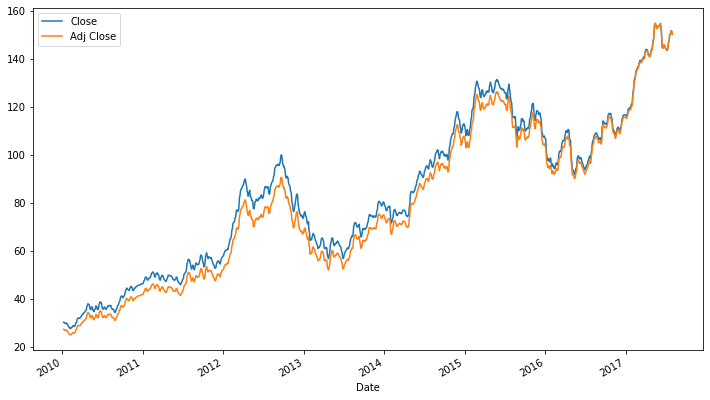

In [170]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

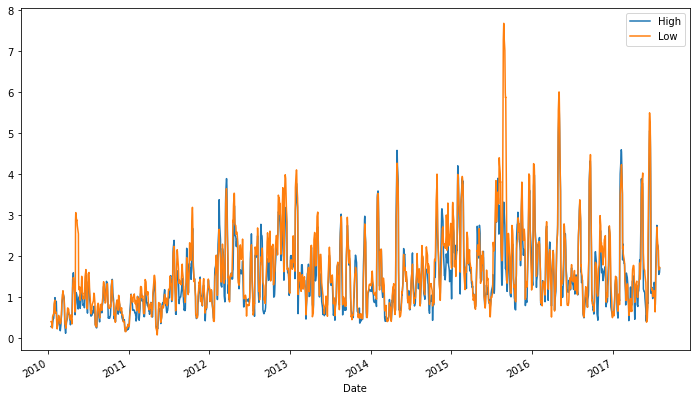

In [171]:
aapl.rolling(10)[['High', 'Low']].std().plot();

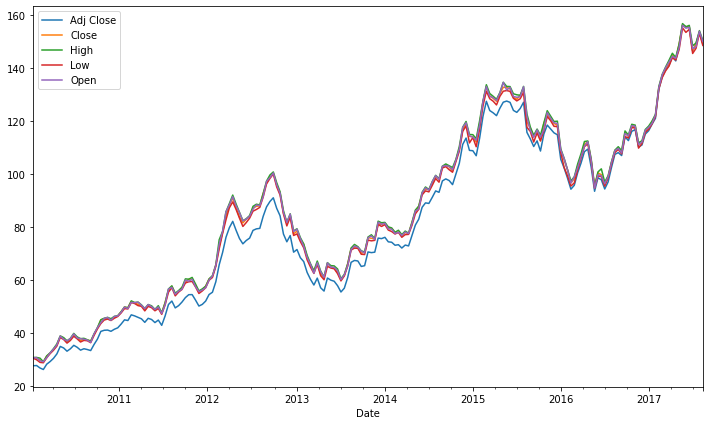

In [172]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

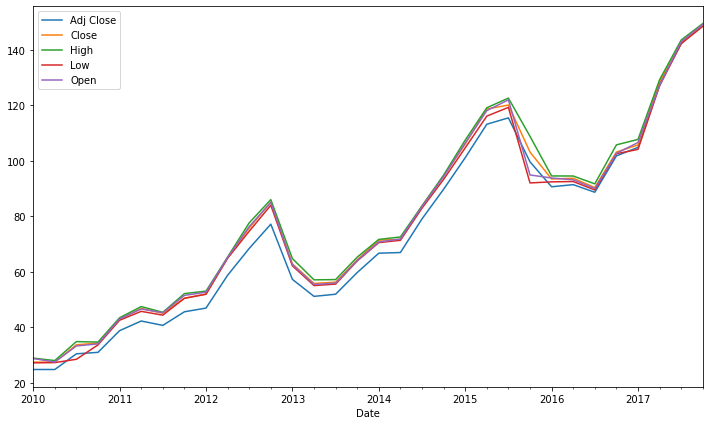

In [173]:
aapl.drop('Volume', axis=1).resample('3M').min().plot();

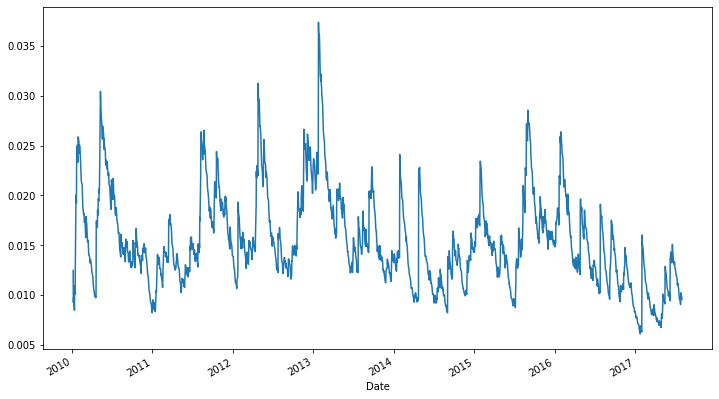

In [174]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

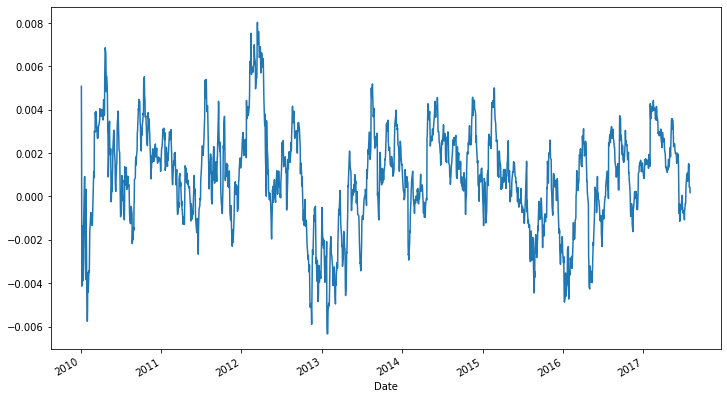

In [175]:
aapl['High'].pct_change().ewm(span=50).mean().plot();

# "Real World" Data

In [176]:
from avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [177]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

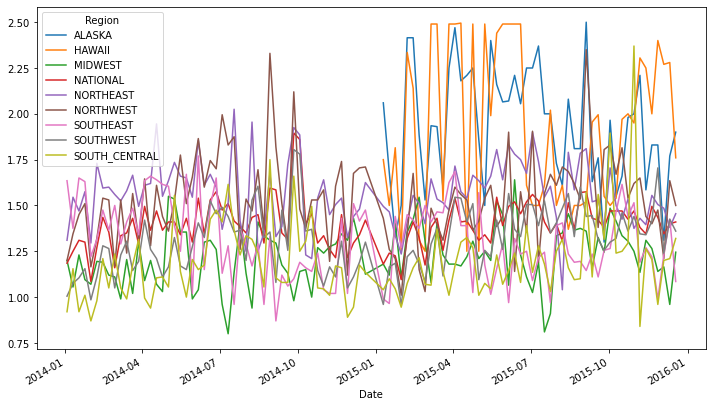

In [178]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

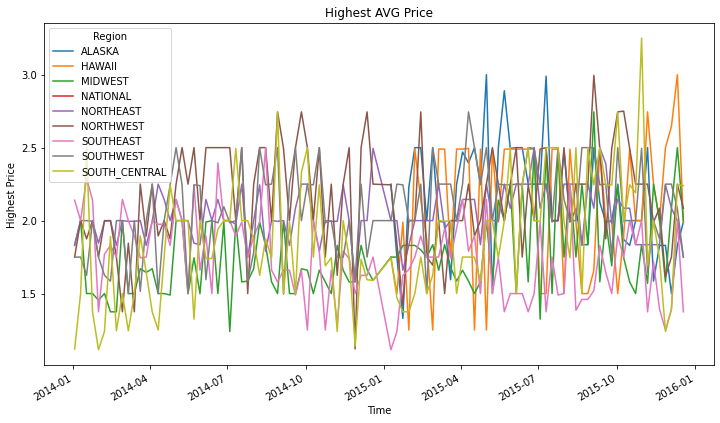

In [179]:
hass.groupby(['Date', 'Region'])['High Price'].mean().unstack().ffill().plot();
plt.xlabel('Time')
plt.ylabel('Highest Price')
plt.title('Highest AVG Price');

In [180]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

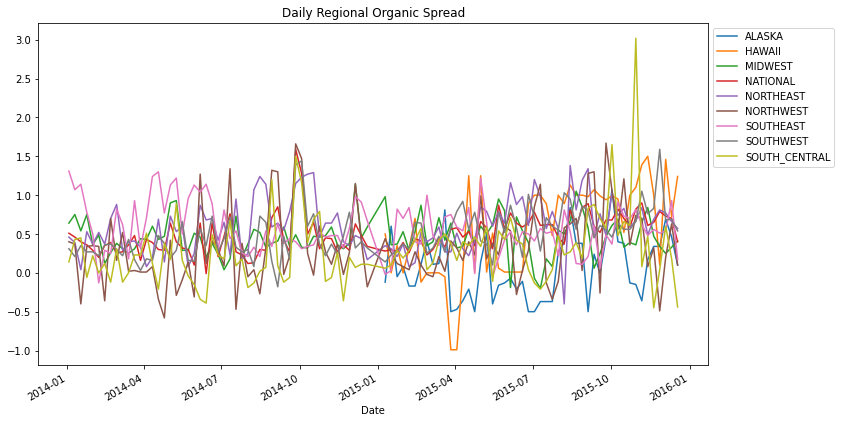

In [181]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [182]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


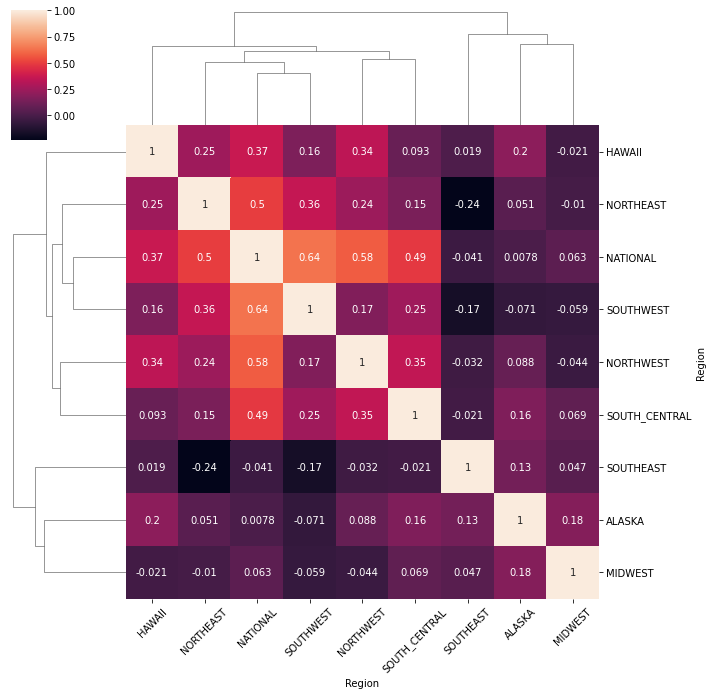

In [183]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!